In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
from scipy.stats import t as st
import pandas as pd
from table import table
raw = pd.read_csv('time_series_19-covid-Confirmed.csv')
raw

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0               NaN        Thailand  15.0000  101.0000        2        3   
1               NaN           Japan  36.0000  138.0000        2        1   
2               NaN       Singapore   1.2833  103.8333        0        1   
3               NaN           Nepal  28.1667   84.2500        0        0   
4               NaN        Malaysia   2.5000  112.5000        0        0   
..              ...             ...      ...       ...      ...      ...   
453             NaN         Somalia   5.1521   46.1996        0        0   
454             NaN        Tanzania  -6.3690   34.8888        0        0   
455             NaN     The Bahamas  24.2500  -76.0000        0        0   
456  Virgin Islands              US  18.3358  -64.8963        0        0   
457  Cayman Islands  United Kingdom  19.3133  -81.2546        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/7/20  3/8/20  3/9/20  3/10/20  \
0          5        7        8        8  ...      50      50      50       53   
1          2        2        4        4  ...     461     502     511      581   
2          3        3        4        5  ...     138     150     150      160   
3          0        1        1        1  ...       1       1       1        1   
4          0        3        4        4  ...      93      99     117      129   
..       ...      ...      ...      ...  ...     ...     ...     ...      ...   
453        0        0        0        0  ...       0       0       0        0   
454        0        0        0        0  ...       0       0       0        0   
455        0        0        0        0  ...       0       0       0        0   
456        0        0        0        0  ...       0       0       0        0   
457        0        0        0        0  ...       0       0       0        0   

     3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  
0         59       70       75       82      114      147  
1        639      639      701      773      839      825  
2        178      178      200      212      226      243  
3          1        1        1        1        1        1  
4        149      149      197      238      428      566  
..       ...      ...      ...      ...      ...      ...  
453        0        0        0        0        0        1  
454        0        0        0        0        0        1  
455        0        0        0        0        0        1  
456        0        0        0        1        1        1  
457        0        0        1        1        1        1  

[458 rows x 59 columns]

In [2]:
raw.loc[156]

Province/State             NaN
Country/Region    Korea, South
Lat                       36.0
Long                     128.0
1/22/20                      1
1/23/20                      1
1/24/20                      2
1/25/20                      2
1/26/20                      3
1/27/20                      4
1/28/20                      4
1/29/20                      4
1/30/20                      4
1/31/20                     11
2/1/20                      12
2/2/20                      15
2/3/20                      15
2/4/20                      16
2/5/20                      19
2/6/20                      23
2/7/20                      24
2/8/20                      24
2/9/20                      25
2/10/20                     27
2/11/20                     28
2/12/20                     28
2/13/20                     28
2/14/20                     28
2/15/20                     28
2/16/20                     29
2/17/20                     30
2/18/20                     31
2/19/20 

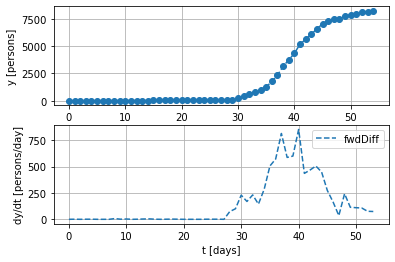

In [3]:
def fwdDiff(x,y):
    dydx=(y[1:]-y[:-1])/(x[1:]-x[:-1])
    return dydx

y=np.array(raw.loc[156])[4:]
Nd=len(y)
t=np.arange(0,Nd)
plt.subplot(2, 1, 1)
plt.plot(t,y,'--o')
plt.xlabel('t [days]')
plt.ylabel('y [persons]')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(t[:-1],fwdDiff(t,y),'--',label='fwdDiff')
plt.xlabel('t [days]')
plt.ylabel('dy/dt [persons/day]')
plt.grid()
plt.legend()

alpha=2.4491371933318362e-05


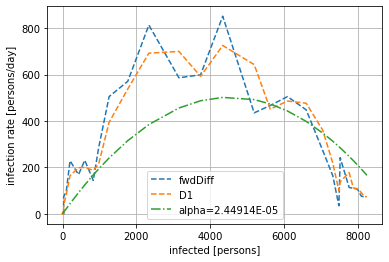

In [4]:
def D1(x,y):
    dydx=np.empty_like(y)
    dydx[0]=(y[1]-y[0])/(x[1]-x[0])
    dydx[1:-1]=(y[2:]-y[:-2])/(x[2:]-x[:-2])
    dydx[-1]=(y[-1]-y[-2])/(x[-1]-x[-2])
    return dydx

yp=D1(t,y)
Np=np.ceil(y[-1]*1.1) # approx # persons succeptible
alpha=np.mean(yp/((Np-y)*y)) # (per*day)^-1
print(f'{alpha=}')
plt.plot(y[:-1],fwdDiff(t,y),'--',label='fwdDiff')
plt.plot(y,yp,'--',label='D1')
plt.plot(y,alpha*(Np-y)*y,'-.',label=f'{alpha=:G}')
plt.xlabel('infected [persons]')
plt.ylabel('infection rate [persons/day]')
plt.grid()
plt.legend()

|    ic    ||  alpha   ||    Np    ||    tc    |
------------------------------------------------
          0  2.4491e-05        9060      4.5067
          1                                    


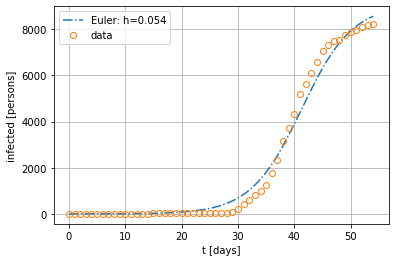

In [5]:
t0,tf=t[0],t[-1] # days
y0=y[0]; # persons
f = lambda y: alpha*(Np-y)*y # dy/dt

Nt=1001; Ntm1=Nt-1 # # of points; # of panels
h=(tf-t0)/(Ntm1) # step size [days]
tt=np.empty(Nt); yy=np.empty(Nt) # initialize
tt[0],yy[0]=t0,y0 # intitial condition
for i in np.arange(Ntm1):
    tt[i+1]=tt[i]+h
    yy[i+1]=yy[i]+h*f(yy[i])
    
plt.plot(tt,yy,'-.',label=f'Euler: {h=:G}')
plt.plot(t,y,'o',markerfacecolor='none',label='data')
plt.xlabel('t [days]')
plt.ylabel('infected [persons]')
plt.grid()
plt.legend()
table(ic=[t0,y0],alpha=[alpha],Np=[Np],tc=[1/(Np*alpha)])

acov=array([[ 3.05230636e+03, -4.55702073e-05],
       [-4.55702073e-05,  1.71961068e-12]])
|    a     ||   astd   |
------------------------
       8226      55.248
   4.03e-05  1.3113e-06


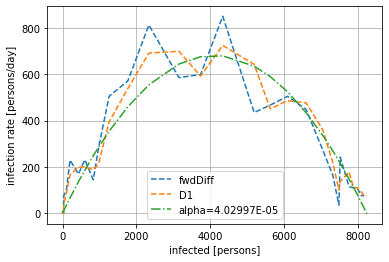

In [6]:
yp=D1(t,y)
a,acov=opt.curve_fit(lambda y,Np,alpha: Np*alpha*y-alpha*y**2,y,yp)
Np,alpha=a
astd = np.sqrt(np.diag(acov))
print(f'{acov=}')
table(a=a,astd=astd)
plt.plot(y[:-1],fwdDiff(t,y),'--',label='fwdDiff')
plt.plot(y,yp,'--',label='D1')
plt.plot(y,alpha*(Np-y)*y,'-.',label=f'{alpha=:G}')
plt.xlabel('infected [persons]')
plt.ylabel('infection rate [persons/day]')
plt.grid()
plt.legend()

|    ic    ||  alpha   ||    Np    |
------------------------------------
          0    4.03e-05        8226
          1                        


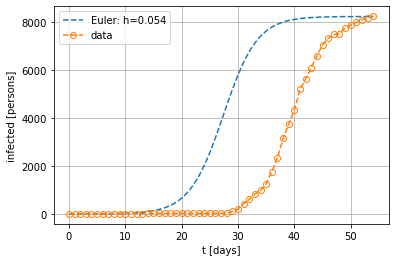

In [7]:
t0,tf=t[0],t[-1] # days
y0=y[0]; # persons
f = lambda y: alpha*(Np-y)*y # dy/dt

Nt=1001; Ntm1=Nt-1 # # of points; # of panels
h=(tf-t0)/(Ntm1) # step size [days]
tt=np.empty(Nt); yy=np.empty(Nt) # initialize
tt[0],yy[0]=t0,y0 # intitial condition
for i in np.arange(Ntm1):
    tt[i+1]=tt[i]+h
    yy[i+1]=yy[i]+h*f(yy[i])
    
plt.plot(tt,yy,'--',label=f'Euler: {h=:G}')
plt.plot(t,y,'--o',markerfacecolor='none',label='data')
plt.xlabel('t [days]')
plt.ylabel('infected [persons]')
plt.grid()
plt.legend()
table(ic=[t0,y0],alpha=[alpha],Np=[Np])

|    a     ||   cl95   ||  tstat   |
------------------------------------
       8226      110.81      2.0057
   4.03e-05  2.6302e-06            


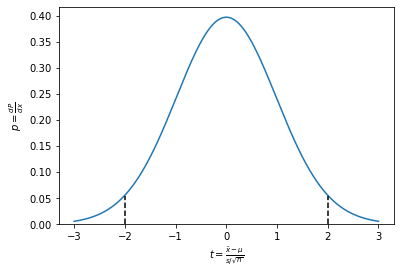

In [8]:
tstat=st.ppf(.975, Nd-2) # t = (y-mu)/(s)
Np_cl95,alpha_cl95=tstat*astd 
x=np.linspace(-3,3,1000)
plt.plot(x,st.pdf(x,Nd-2))
plt.plot(2*[tstat],[0,st.pdf(tstat,Nd-2)],'--k')
plt.plot(2*[st.ppf(.025,Nd-2)],[0,st.pdf(tstat,Nd-2)],'--k')
plt.xlabel(r'$t=\frac{\bar{x}-\mu}{s/\sqrt{n}}$')
plt.ylabel(r'$p=\frac{dP}{dx}$')
plt.ylim(bottom=0)
table(a=a,cl95=[Np_cl95,alpha_cl95],tstat=[tstat])

In [9]:
tc=1/(Np*alpha)
y=y/Np
t=t/tc
h = h/tc
f = lambda y: (1-y)*y # dy/dt
table(tc=[tc],h=[h])

|    tc    ||    h     |
------------------------
     3.0165    0.017901


| epsilon  ||  L2min   ||    h     |
------------------------------------
 2.1321e-06   0.0088496    0.017901


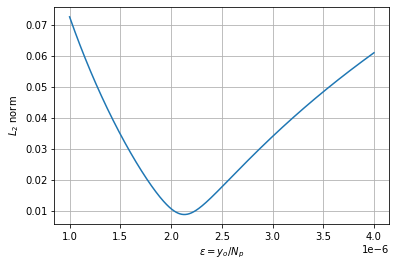

In [10]:
def getL2(yy0):
    L2=[]
    for y0 in yy0:
        tt[0],yy[0]=t0,y0 # intitial condition
        i=0
        while i<Nt-1:
            tt[i+1]=tt[i]+h
            yy[i+1]=yy[i]+h*f(yy[i])
            i+=1
        ynum = interp1d(tt,yy)
        L2.append(np.sqrt(h*np.sum((y[:-1]-ynum(t[:-1]))**2)))
    return L2
yy0=np.linspace(.1,.4,1000)*1e-5
L2=getL2(yy0)
plt.plot(yy0,L2)
plt.xlabel(r'$\epsilon = y_o/N_p$')
plt.ylabel(r'$L_2$ norm')
plt.grid()
y0=yy0[np.argmin(L2)]
table(epsilon=[y0],L2min=[np.min(L2)],h=[h])

|    ic    ||  alpha   ||    Np    ||    tc    |
------------------------------------------------
          0    4.03e-05        8226      3.0165
 2.1321e-06                                    


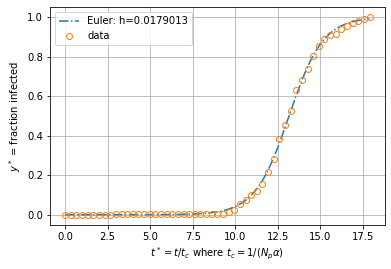

In [11]:
tt[0],yy[0]=t0,y0 # intitial condition
for i in np.arange(Ntm1):
    tt[i+1]=tt[i]+h
    yy[i+1]=yy[i]+h*f(yy[i])
    
plt.plot(tt,yy,'-.',label=f'Euler: {h=:G}')
plt.plot(t,y,'o',markerfacecolor='none',label='data')
plt.xlabel(r'$t^* =  t/t_c$ where $t_c=1/(N_p \alpha )$')
plt.ylabel('$y^*$ = fraction infected')
plt.grid()
plt.legend()
table(ic=[t0,y0],alpha=[alpha],Np=[Np],tc=[1/(Np*alpha)])

In [12]:
# coefficient of determination
ynum = interp1d(tt,yy,fill_value='extrapolate')
Rsqr=1-np.sum((y-ynum(t))**2)/np.sum((np.mean(y)-ynum(t))**2)
print(Rsqr)

0.9994299653906654


In [13]:
# t = (y-mu)/s where s^2=sum((y-mu)^2)/(degs of freedom) **for each data point**
# 3 determined parameters (alpha,Np,y0) from data
tstat=st.ppf(.975, Nd-3) 
SR=(y-ynum(t))**2
SSR=np.sum(SR)
s=np.sqrt(SSR/(len(SR)-3)) # sample standard deviation
print(f'{(SSR,s,tstat*s)=}')

(SSR,s,tstat*s)=(0.004467510675076236, 0.009268962554050434, 0.01859953407715941)


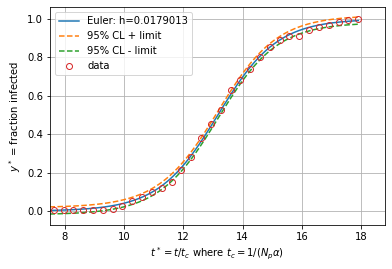

In [14]:
plt.plot(tt,yy,'-',label=f'Euler: {h=:G}')
plt.plot(tt,yy+tstat*s,'--',label='95% CL + limit')
plt.plot(tt,yy-tstat*s,'--',label='95% CL - limit')
plt.plot(t,y,'o',markerfacecolor='none',label='data')
plt.xlabel(r'$t^* =  t/t_c$ where $t_c=1/(N_p \alpha )$')
plt.ylabel('$y^*$ = fraction infected')
plt.xlim(left=7.5)
plt.legend()
plt.grid()